Nama    : Aphrodity Nirmala Putri

NIM     : 23/511906/PA/21852

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import sympy as sp
import control as ct
from control.matlab import tf2ss, ss2zpk

In [3]:
g1_num = [1, 5]
g1_den = [1, 6, 4]
g2_num = [1]
g2_den = [1, 1]
g3_num = [1]
g3_den = [1, 3]

1. a.

In [4]:
G1=ct.TransferFunction(g1_num, g1_den)
G2=ct.TransferFunction(g2_num, g2_den)
G3=ct.TransferFunction(g3_num, g3_den)
G4=ct.parallel(g1, g2)
g=ct.series(g1, g2)
G5=ct.feedback(g, g3)

print("i. H(s)", g1)
print("ii. H(s)", g2)
print("iii. H(s)", g3)
print("iv. H(s)", g4)
print("v. H(s)", g5)

NameError: name 'g1' is not defined

1. b.

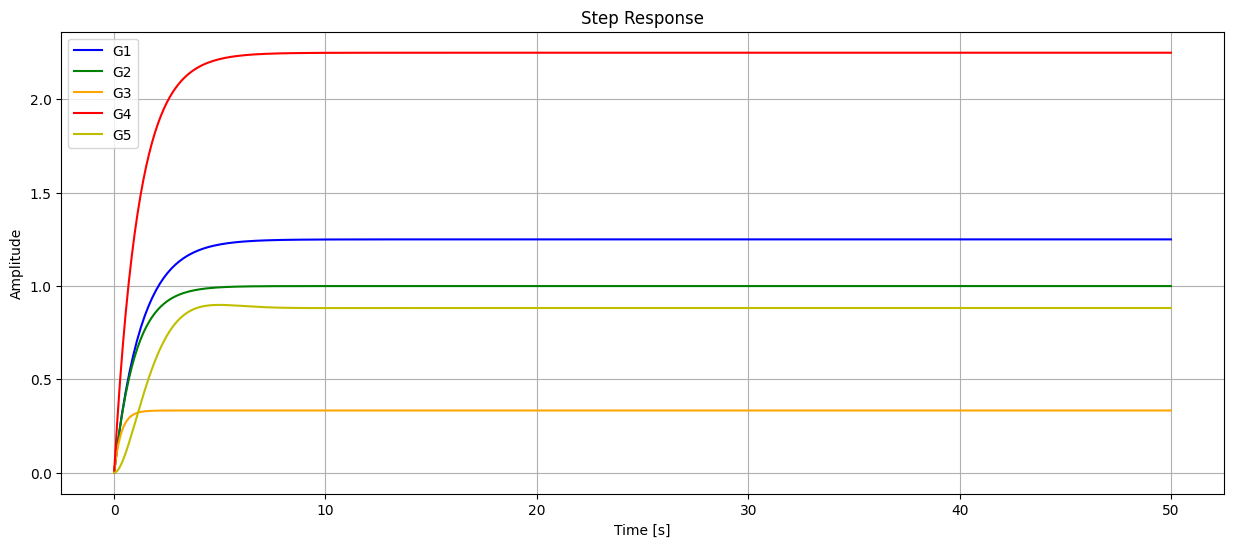


=== Step Response Information ===

--- G1 ---
RiseTime : 2.8314
SettlingTime : 5.1149
SettlingMin : 1.1260
SettlingMax : 1.2500
Overshoot : 0.0000
Undershoot : 0.0000
Peak : 1.2488
PeakTime : 9.0424
SteadyStateValue : 1.2500

--- G2 ---
RiseTime : 2.1630
SettlingTime : 3.9772
SettlingMin : 0.9000
SettlingMax : 1.0000
Overshoot : 0.0000
Undershoot : 0.0000
Peak : 0.9990
PeakTime : 6.9078
SteadyStateValue : 1.0000

--- G3 ---
RiseTime : 0.7443
SettlingTime : 1.3257
SettlingMin : 0.3022
SettlingMax : 0.3333
Overshoot : 0.0000
Undershoot : 0.0000
Peak : 0.3330
PeakTime : 2.3026
SteadyStateValue : 0.3333

--- G4 ---
RiseTime : 2.5574
SettlingTime : 4.6582
SettlingMin : 2.0326
SettlingMax : 2.2500
Overshoot : 0.0000
Undershoot : 0.0000
Peak : 2.2486
PeakTime : 9.0424
SteadyStateValue : 2.2500

--- G5 ---
RiseTime : 2.3719
SettlingTime : 3.5842
SettlingMin : 0.7964
SettlingMax : 0.8990
Overshoot : 1.8847
Undershoot : 0.0000
Peak : 0.8990
PeakTime : 4.9809
SteadyStateValue : 0.8824


In [ ]:
G_list = [G1, G2, G3, G4, G5]
colors = ['b', 'g', 'orange', 'r', 'y']
labels = ['G1', 'G2', 'G3', 'G4', 'G5']

plt.figure(figsize=(15, 6))

# Simpan informasi step response
info_list = []

for i, G in enumerate(G_list):
    t, y = ct.step_response(G, 50)
    plt.plot(t, y, label=labels[i], color=colors[i])

    # Step Response Information
    data = ct.step_info(G)
    info_list.append(data)



# Label dan tampilan
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step Response')
plt.legend()
plt.grid()
plt.show()

# Menampilkan informasi step response di terminal untuk semua sistem
print("\n=== Step Response Information ===")
for i, data in enumerate(info_list):
    print(f"\n--- {labels[i]} ---")
    for k, v in data.items():
        print(f'{k} : {float(v):.4f}')

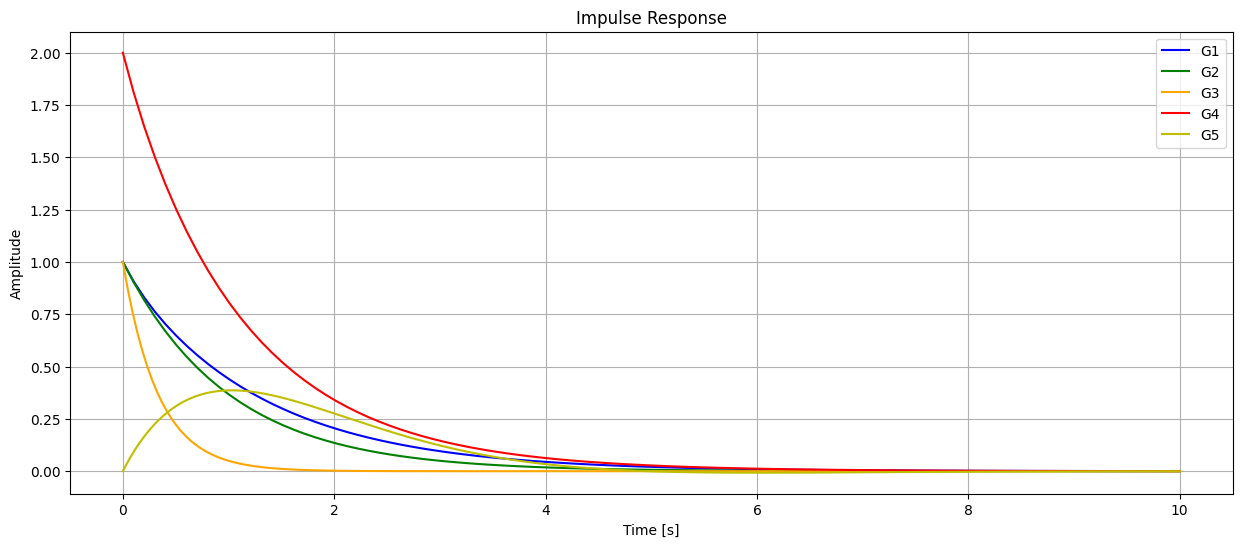

In [ ]:
G_list = [G1, G2, G3, G4, G5]
colors = ['b', 'g', 'orange', 'r', 'y']
labels = ['G1', 'G2', 'G3', 'G4', 'G5']

plt.figure(figsize=(15, 6))

# Simpan informasi step response
info_list = []

for i, G in enumerate(G_list):
    t, y = ct.impulse_response(G, 10)
    plt.plot(t, y, label=labels[i], color=colors[i])


# Label dan tampilan
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Impulse Response')
plt.legend()
plt.grid()
plt.show()

2. a.

In [ ]:
T_list = [2, 4, 6, 8]

H_list = []  # List untuk menyimpan fungsi transfer

for T in T_list:
    H_num = [1]
    H_den = [T, 1]
    H = ct.TransferFunction(H_num, H_den)
    H_list.append(H)  # Simpan H ke dalam list

# Cetak hasil fungsi transfer
for i, H in enumerate(H_list):
    print(f"H{i+1}(s) = {H}")

H1(s) = <TransferFunction>: sys[570]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   1
-------
2 s + 1

H2(s) = <TransferFunction>: sys[571]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   1
-------
4 s + 1

H3(s) = <TransferFunction>: sys[572]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   1
-------
6 s + 1

H4(s) = <TransferFunction>: sys[573]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   1
-------
8 s + 1



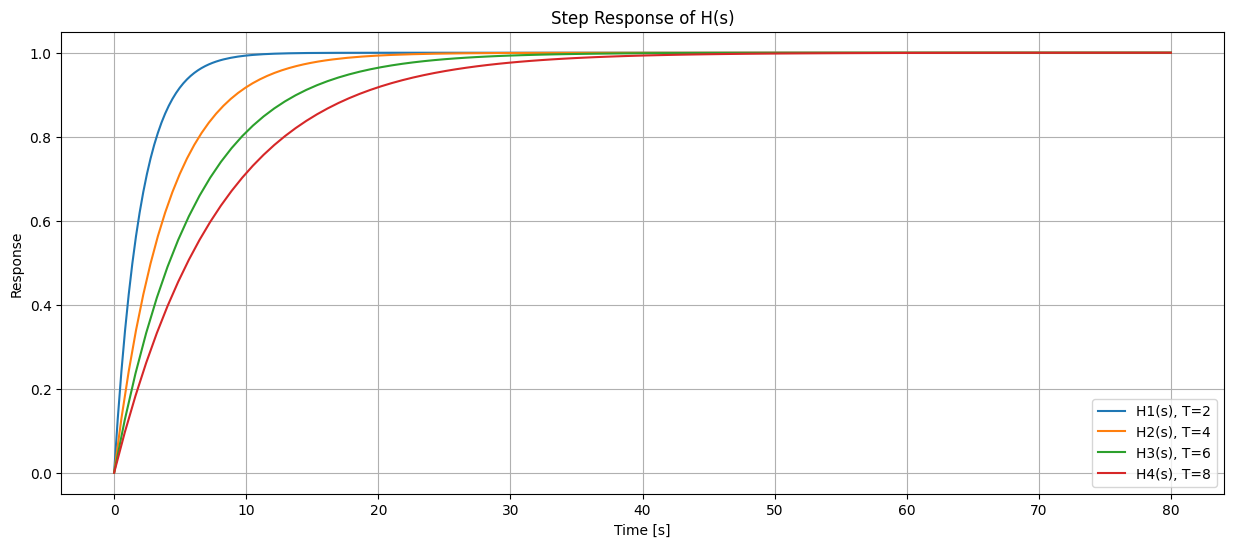

In [5]:
T_list = [2, 4, 6, 8]
H_list = []  # List untuk menyimpan fungsi transfer

plt.figure(figsize=(15, 6))  # Buat figure untuk plot

for i, T in enumerate(T_list, start=1):
    H_num = [1]  # Pembilang tetap [1]
    H_den = [T, 1]  # Penyebut sesuai dengan T
    H = ct.TransferFunction(H_num, H_den)
    H_list.append(H)  # Simpan fungsi transfer
    
    # Step response
    t, y = ct.step_response(H, 80)
    
    # Plot step response
    plt.plot(t, y, label=f"H{i}(s), T={T}")
    

# Plot konfigurasi
plt.xlabel("Time [s]")
plt.ylabel("Response")
plt.title("Step Response of H(s)")
plt.legend()
plt.grid()
plt.show()


2. c.

In [ ]:
T_list = [2, 4, 6, 8]
H_list = []

print("\n=== Daftar Fungsi Transfer dan Step Response ===")

for i, T in enumerate(T_list, start=1):
    H_num = [1]  
    H_den = [T, 1] 
    H = ct.TransferFunction(H_num, H_den)
    H_list.append(H)
    
    print(f"\nH(s) dengan T = {T}:")

    step_info = ct.step_info(H)
    print("Step Response Information:")
    for key, value in step_info.items():
        print(f"  {key} : {value:.4f}")


=== Daftar Fungsi Transfer dan Step Response ===

H(s) dengan T = 2:
Step Response Information:
  RiseTime : 4.3261
  SettlingTime : 7.9544
  SettlingMin : 0.9000
  SettlingMax : 1.0000
  Overshoot : 0.0000
  Undershoot : 0.0000
  Peak : 0.9990
  PeakTime : 13.8155
  SteadyStateValue : 1.0000

H(s) dengan T = 4:
Step Response Information:
  RiseTime : 8.6521
  SettlingTime : 15.9088
  SettlingMin : 0.9000
  SettlingMax : 1.0000
  Overshoot : 0.0000
  Undershoot : 0.0000
  Peak : 0.9990
  PeakTime : 27.6310
  SteadyStateValue : 1.0000

H(s) dengan T = 6:
Step Response Information:
  RiseTime : 13.3969
  SettlingTime : 23.8632
  SettlingMin : 0.9067
  SettlingMax : 1.0000
  Overshoot : 0.0000
  Undershoot : 0.0000
  Peak : 0.9990
  PeakTime : 41.4465
  SteadyStateValue : 1.0000

H(s) dengan T = 8:
Step Response Information:
  RiseTime : 17.3043
  SettlingTime : 31.8175
  SettlingMin : 0.9000
  SettlingMax : 1.0000
  Overshoot : 0.0000
  Undershoot : 0.0000
  Peak : 0.9990
  PeakTime : 5

2. d.


H(s) dengan T = 2
Zeros: []
Poles: [-0.5+0.j]

H(s) dengan T = 4
Zeros: []
Poles: [-0.25+0.j]

H(s) dengan T = 6
Zeros: []
Poles: [-0.16666667+0.j]

H(s) dengan T = 8
Zeros: []
Poles: [-0.125+0.j]


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/control/pzmap.py:372: UserWarning: axis already exists; grid keyword ignored
  warnings.warn("axis already exists; grid keyword ignored")
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/control/pzmap.py:372: UserWarning: axis already exists; grid keyword ignored
  warnings.warn("axis already exists; grid keyword ignored")
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/control/pzmap.py:372: UserWarning: axis already exists; grid keyword ignored
  warnings.warn("axis already exists; grid keyword ignored")


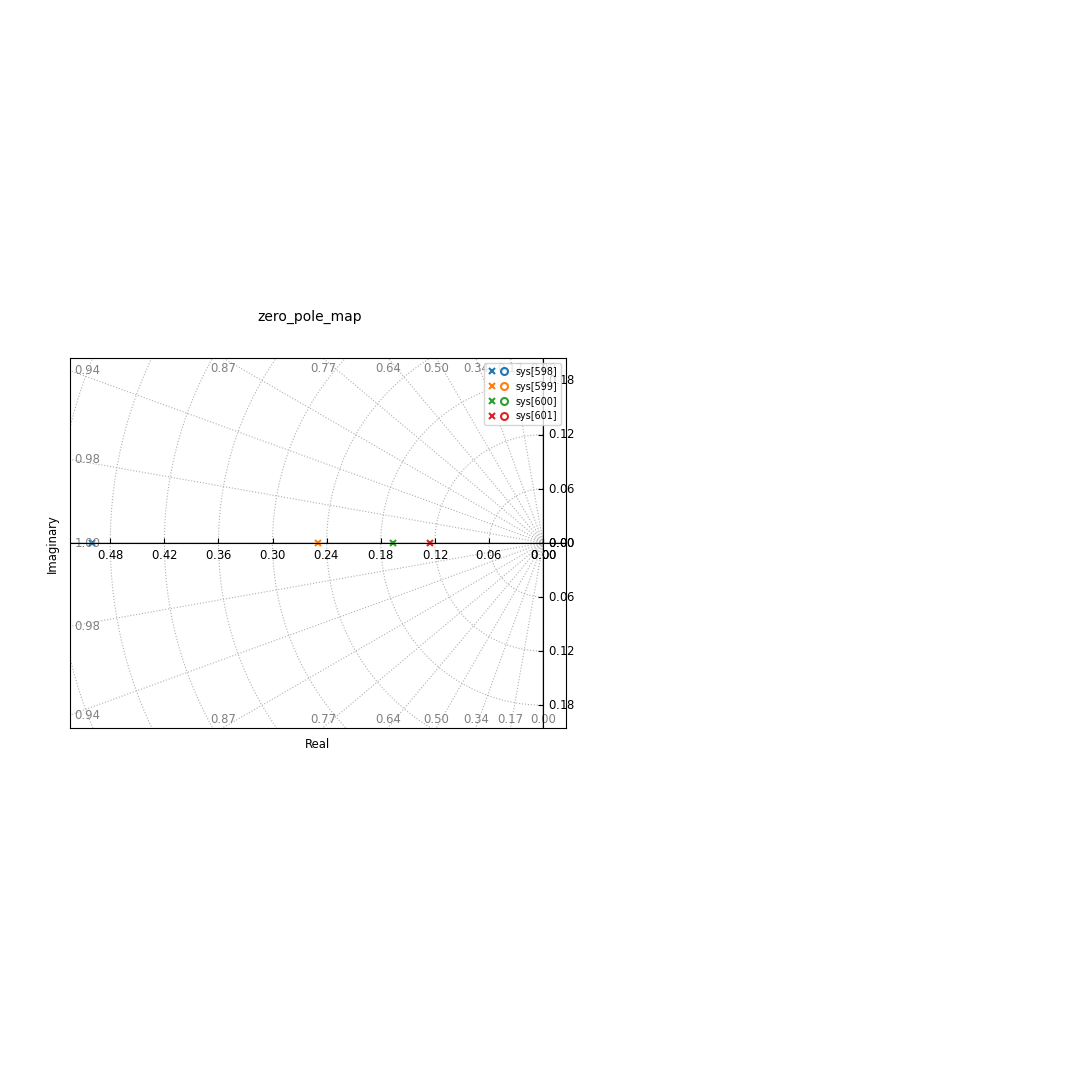

In [ ]:
T_list = [2, 4, 6, 8]
H_list = []


for i, T in enumerate(T_list, start=1):
    H_num = [1]  
    H_den = [T, 1] 
    H = ct.TransferFunction(H_num, H_den)
    H_list.append(H)

    # Dapatkan poles dan zeros
    poles = ct.poles(H)
    zeros = ct.zeros(H)

    print (f"\nH(s) dengan T = {T}")
    print(f"Zeros: {zeros}")
    print(f"Poles: {poles}")
    ct.pole_zero_plot(H, title= 'zero_pole_map', grid=True, marker_size = 5)


3. a.

In [ ]:
w_list = [2, 4, 6, 8]
H_list = []

print("\n=== Fungsi Alih H(s) untuk Setiap w ===")
for i, w in enumerate(w_list, start=1):
    # Hitung pembilang dan penyebut dari H(s)
    H_num = [5 * w**2]
    H_den = [1, 2*w, 5*w**2]
    # Buat fungsi transfer H(s)
    H = ct.TransferFunction(H_num, H_den)
    H_list.append(H)

    # Cetak fungsi transfer
    print(f"\nH{i}(s) dengan w = {w}:")
    print(H)


=== Fungsi Alih H(s) untuk Setiap w ===

H1(s) dengan w = 2:
<TransferFunction>: sys[602]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


      20
--------------
s^2 + 4 s + 20


H2(s) dengan w = 4:
<TransferFunction>: sys[603]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


      80
--------------
s^2 + 8 s + 80


H3(s) dengan w = 6:
<TransferFunction>: sys[604]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


      180
----------------
s^2 + 12 s + 180


H4(s) dengan w = 8:
<TransferFunction>: sys[605]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


      320
----------------
s^2 + 16 s + 320



3. b.

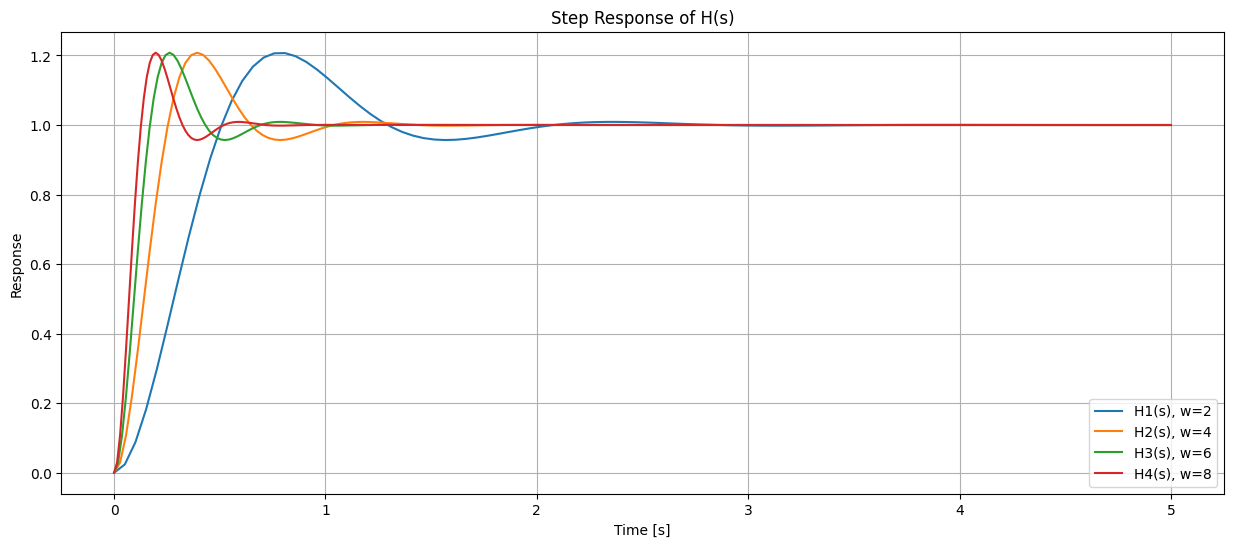

In [6]:
w_list = [2, 4, 6, 8]
H_list = []

plt.figure(figsize=(15, 6))

for i, w in enumerate(w_list, start=1):
    # Hitung pembilang dan penyebut dari H(s)
    H_num = [5 * w**2]
    H_den = [1, 2*w, 5*w**2]

    # Buat fungsi transfer H(s)
    H = ct.TransferFunction(H_num, H_den)
    H_list.append(H)
    t, y = ct.step_response(H, 5)

    # Plot step response
    plt.plot(t, y, label=f"H{i}(s), w={w}")


# Konfigurasi plot step response
plt.xlabel("Time [s]")
plt.ylabel("Response")
plt.title("Step Response of H(s)")
plt.legend()
plt.grid()
plt.show()

3. c.

In [ ]:
w_list = [2, 4, 6, 8]
H_list = []


for i, w in enumerate(w_list, start=1):
    # Hitung pembilang dan penyebut dari H(s)
    H_num = [5 * w**2]
    H_den = [1, 2*w, 5*w**2]

    # Buat fungsi transfer H(s)
    H = ct.TransferFunction(H_num, H_den)
    H_list.append(H)

    # Karakteristik tanggapan sistem
    step_info = ct.step_info(H)
    print(f"\nH(s) dengan w = {w}:")
    for key, value in step_info.items():
        print(f"  {key} : {value:.4f}")



H(s) dengan w = 2:
  RiseTime : 0.3140
  SettlingTime : 1.8839
  SettlingMin : 0.9014
  SettlingMax : 1.2073
  Overshoot : 20.7291
  Undershoot : 0.0000
  Peak : 1.2073
  PeakTime : 0.8024
  SteadyStateValue : 1.0000

H(s) dengan w = 4:
  RiseTime : 0.1570
  SettlingTime : 0.9420
  SettlingMin : 0.9014
  SettlingMax : 1.2073
  Overshoot : 20.7291
  Undershoot : 0.0000
  Peak : 1.2073
  PeakTime : 0.4012
  SteadyStateValue : 1.0000

H(s) dengan w = 6:
  RiseTime : 0.1047
  SettlingTime : 0.6280
  SettlingMin : 0.9014
  SettlingMax : 1.2073
  Overshoot : 20.7291
  Undershoot : 0.0000
  Peak : 1.2073
  PeakTime : 0.2675
  SteadyStateValue : 1.0000

H(s) dengan w = 8:
  RiseTime : 0.0785
  SettlingTime : 0.4710
  SettlingMin : 0.9014
  SettlingMax : 1.2073
  Overshoot : 20.7291
  Undershoot : 0.0000
  Peak : 1.2073
  PeakTime : 0.2006
  SteadyStateValue : 1.0000


3. d.


H(s) dengan T = 8
Zeros: []
Poles: [-2.+4.j -2.-4.j]

H(s) dengan T = 8
Zeros: []
Poles: [-4.+8.j -4.-8.j]

H(s) dengan T = 8
Zeros: []
Poles: [-6.+12.j -6.-12.j]

H(s) dengan T = 8
Zeros: []
Poles: [-8.+16.j -8.-16.j]


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/control/pzmap.py:372: UserWarning: axis already exists; grid keyword ignored
  warnings.warn("axis already exists; grid keyword ignored")
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/control/pzmap.py:372: UserWarning: axis already exists; grid keyword ignored
  warnings.warn("axis already exists; grid keyword ignored")
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/control/pzmap.py:372: UserWarning: axis already exists; grid keyword ignored
  warnings.warn("axis already exists; grid keyword ignored")


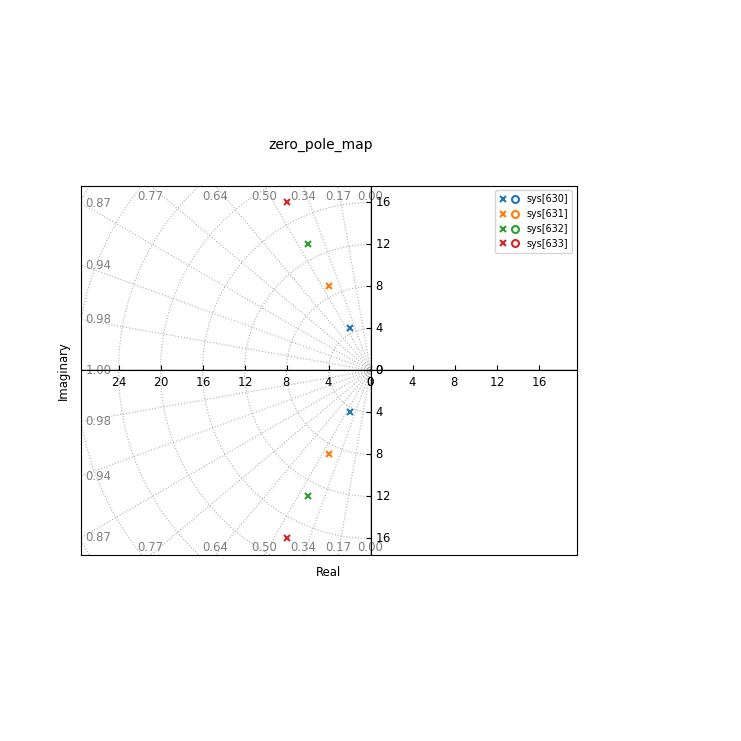

In [ ]:
w_list = [2, 4, 6, 8]
H_list = []

for i, w in enumerate(w_list, start=1):
    H_num = [5 * w**2]
    H_den = [1, 2*w, 5*w**2]
    H = ct.TransferFunction(H_num, H_den)
    H_list.append(H)

    # Dapatkan poles dan zeros
    poles = ct.poles(H)
    zeros = ct.zeros(H)

    print (f"\nH(s) dengan T = {T}")
    print(f"Zeros: {zeros}")
    print(f"Poles: {poles}")
    ct.pole_zero_plot(H, title= 'zero_pole_map', grid=True, marker_size = 5)
